<a href="https://colab.research.google.com/github/Nirikshan95/Fashion-MNIST-Classification-Using-Deep-Learning/blob/main/fashion_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#loading nessesary libraries
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt

In [7]:
#loading datasets
(x_train,y_train),(x_test,y_test)=datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
#shapes of the training sets
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [9]:
#sample from x train
x_train[4679]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          0,  59,  81,  87,  64,  26,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,
        129,  72,   7,   8,  21,  82,  63,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   5,   1,   7,   0, 113,
         41,   0,   0,   0,   0,   0,  82,  50,   0,   5,   4,   3,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 101,
          0,   0,   0,   0,   0,   0,   0,  91,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,  34,  59,  60, 112,   0,
          0,   0,   0,   0,   0,   0,   0,  68,  83,  66,  56,   0,   0,
          0,   0],
       [  0,   0,   0,   2,   0,  28, 136, 124, 218, 193, 235, 185, 161,
        181, 183, 193, 196, 197, 200, 188, 187, 202, 198, 199, 190, 158,
        156,   0],
       [  0,   0,   0,   5,   0,  40, 191, 166, 148, 132, 121, 154, 181,
        176, 174, 177, 175, 175, 176, 178, 181, 166, 157, 162, 161, 166,
        186,  10],
       [  0,   0,   0,   2,   0,  80, 204, 187, 199, 204, 205, 212, 217,
        209, 210, 211, 212, 210, 215, 209, 215, 208, 200, 189, 171, 169,
        192,  24],
       [  0,   0,   0,   2,   0,  84, 225, 206, 215, 210, 209, 216, 212,
        210, 210, 211, 212, 215, 210, 211, 208, 200, 191, 206, 205, 189,
        239,  41],
       [  3,   0,   3,   0,   0, 101, 228, 209, 210, 210, 212, 216, 220,
        213, 211, 210, 207, 210, 211, 208, 202, 196, 203, 217, 202, 193,
        243,  56],
       [  4,   2,   0,   0,  87, 203, 218, 213, 214, 213, 215, 218, 215,
        211, 212, 212, 212, 210, 204, 203, 202, 203, 208, 198, 200, 206,
        255,  78],
       [  0,   0,   0, 112,  74,  82, 230, 213, 219, 221, 220, 221, 218,
        217, 219, 219, 220, 219, 213, 214, 214, 215, 216, 213, 219, 208,
        249,  50],
       [  0,   0,  91,  71,   0, 124, 239, 207, 213, 206, 209, 213, 210,
        209, 209, 208, 208, 208, 204, 202, 201, 200, 205, 203, 200, 195,
        255,  44],
       [  0,  80,  56,   0,   0, 130, 247, 218, 212, 227, 219, 213, 211,
        212, 211, 209, 208, 207, 208, 207, 207, 209, 214, 220, 218, 212,
        255,  57],
       [ 11, 112,   0,   1,   0, 138, 242, 225, 246, 191, 238, 248, 245,
        246, 245, 244, 244, 244, 247, 246, 246, 248, 247, 189, 236, 224,
        255,  55],
       [ 70,  53,   0,   1,   0, 141, 240, 221, 239, 173, 219, 229, 222,
        221, 222, 221, 221, 221, 220, 220, 219, 221, 223, 181, 230, 221,
        255,  57],
       [ 87,  29,   0,   1,   0, 149, 238, 220, 223, 250, 235, 226, 232,
        228, 226, 226, 225, 225, 224, 224, 224, 223, 228, 238, 229, 209,
        255,  68],
       [ 91,  25,   0,   1,   0, 154, 238, 218, 230, 218, 223, 224, 224,
        223, 224, 223, 224, 223, 222, 222, 222, 222, 224, 218, 221, 208,
        255,  79],
       [ 58,  95,   0,   0,   0, 169, 238, 218, 228, 229, 227, 223, 229,
        223, 228, 225, 224, 225, 223, 224, 223, 223, 226, 222, 216, 215,
        255,  92],
       [  0,  98,  83,   0,   0, 154, 246, 228, 227, 233, 235, 235, 233,
        243, 237, 232, 232, 220, 219, 219, 219, 219, 218, 217, 219, 211,
        228,  97],
       [  0,   0,  61, 126, 104, 176, 215, 218, 226, 219, 216, 221, 215,
        208, 194, 175, 226, 227, 227, 227, 227, 226, 228, 226, 226, 225,
        242, 109],
       [  0,   0,   0,   0,  13, 219, 24

In [10]:
#sample from y train
y_train[4679]

8

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

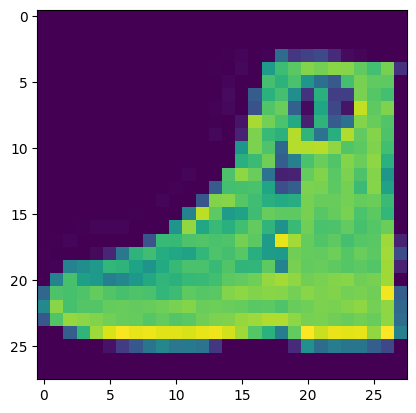

In [12]:
plt.imshow(x_train[376])
plt.show()

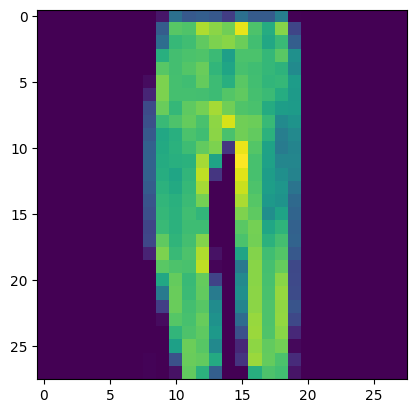

1


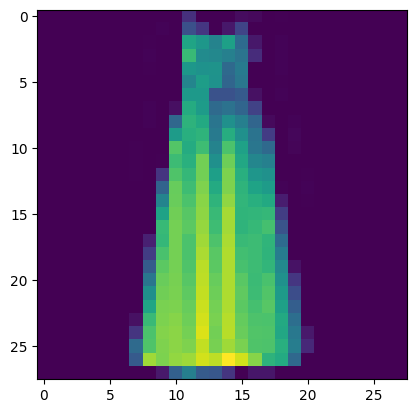

3


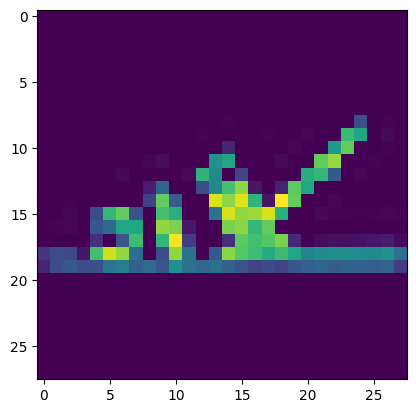

5


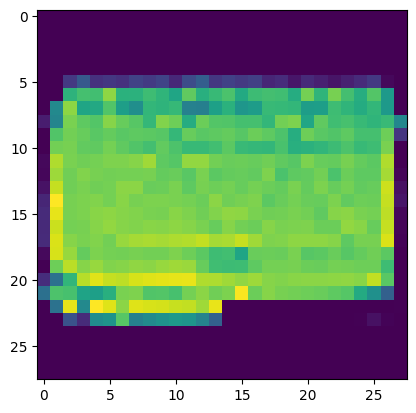

8


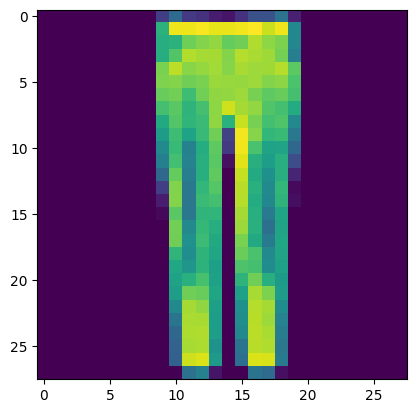

1


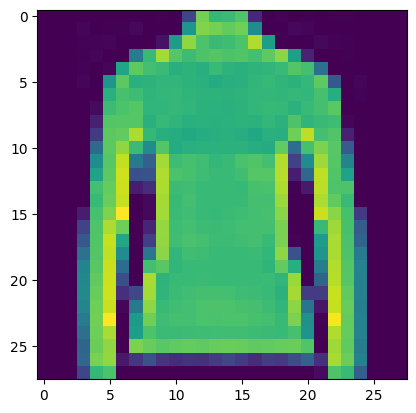

2


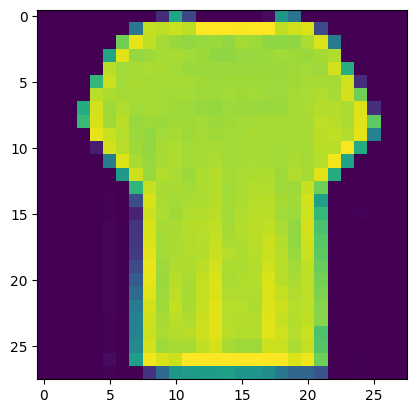

0


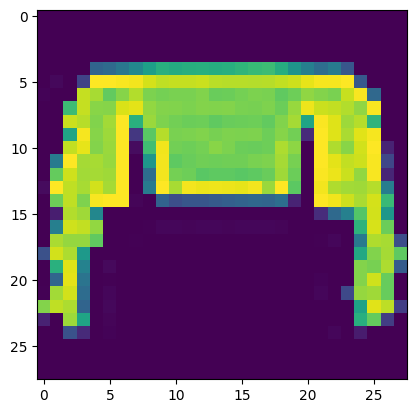

6


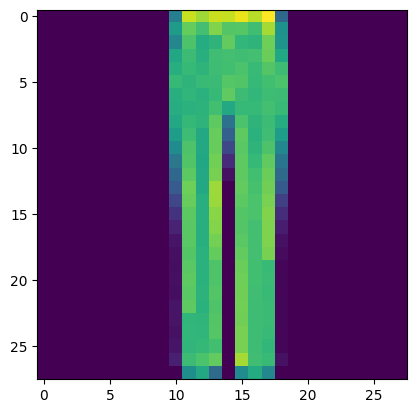

1


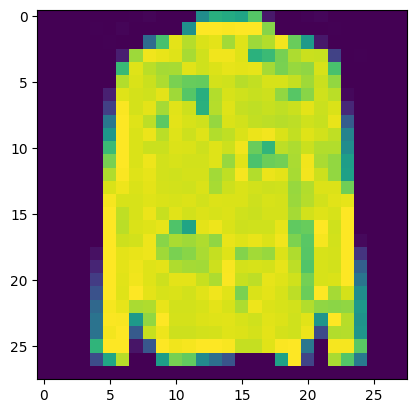

6


In [13]:
for i in range(10):
    sample=np.random.randint(0,len(x_train))
    plt.imshow(x_train[sample])
    plt.show()
    print(y_train[sample])

In [14]:
model=models.Sequential([
    layers.Conv2D(30,(3,3),input_shape=(28,28,1),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(60,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(60,activation='relu'),
    layers.Dense(10,activation='softmax')]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),batch_size=10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7826 - loss: 0.7950 - val_accuracy: 0.8476 - val_loss: 0.4177
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8714 - loss: 0.3499 - val_accuracy: 0.8672 - val_loss: 0.3777
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8830 - loss: 0.3111 - val_accuracy: 0.8665 - val_loss: 0.3658
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8931 - loss: 0.2843 - val_accuracy: 0.8810 - val_loss: 0.3451
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8979 - loss: 0.2759 - val_accuracy: 0.8821 - val_loss: 0.3340
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9016 - loss: 0.2594 - val_accuracy: 0.8847 - val_loss: 0.3433
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9073 - loss: 0.2481 - val_accuracy: 0.8776 - val_loss: 0.3807
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9101 - loss: 0

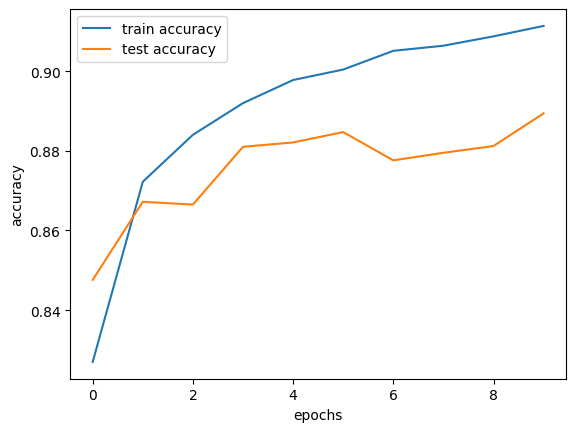

In [23]:
os.makedirs('results/plots',exist_ok=True)

plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='test accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('results/plots/accuracy.png')
plt.show()

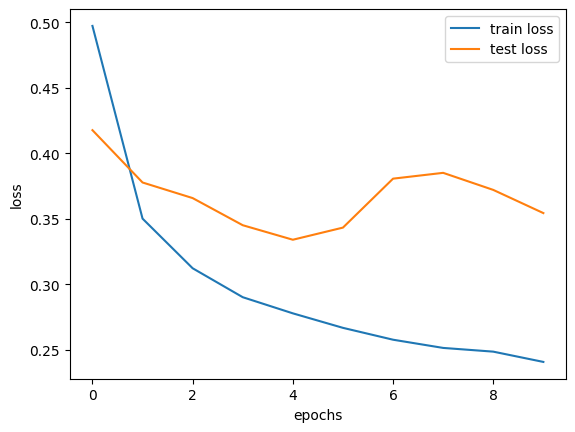

In [24]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('results/plots/loss.png')
plt.show()

In [25]:
history.history['val_accuracy']

[0.847599983215332,
 0.8672000169754028,
 0.8665000200271606,
 0.8809999823570251,
 0.882099986076355,
 0.8847000002861023,
 0.8776000142097473,
 0.8794999718666077,
 0.8812000155448914,
 0.8894000053405762]

In [26]:
history.history['accuracy']

[0.8270000219345093,
 0.8722333312034607,
 0.8840166926383972,
 0.8919666409492493,
 0.897766649723053,
 0.9003999829292297,
 0.9050999879837036,
 0.9063833355903625,
 0.9087333083152771,
 0.9113500118255615]

In [27]:
pred=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8868 - loss: 0.3487


In [28]:
#accuracy
pred[1]

0.8894000053405762

In [29]:
#loss
pred[0]

0.35438206791877747

In [30]:
# Predict on a single test image (e.g., the first test image)
single_image = x_test[0].reshape(1, 28, 28, 1)
prediction = model.predict(single_image)

# Display the predicted class
predicted_class = np.argmax(prediction)
print(f"Predicted class: {predicted_class}")
print(f"actuall class: {y_test[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
Predicted class: 9
actuall class: 9


In [31]:
single_image2 = x_test[675].reshape(1, 28, 28, 1)
prediction2 = model.predict(single_image2)
predicted_class2 = np.argmax(prediction2)
print(f"Predicted class: {predicted_class2}")
print(f"actuall class:{y_test[675]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted class: 8
actuall class:8
